## Descriptive statistics and Exploratory Data Analysis

In real world applications, the distributions and parameters of random variables are rarely known. Instead, we must determine reasonable forms and values from a data set.

A first approach is to visualize the data set. In order to be able to find a reasonable distribution to use, we have to be able to identify distributions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(seed=42)
def histogram(X, bins=None):
    plt.hist(X, bins=bins)   

def ogive(X, bins=None):
    plt.hist(X, cumulative=True, bins=bins)   

The simplest discrete distribution is the Bernoulli, or two-point, distribution.

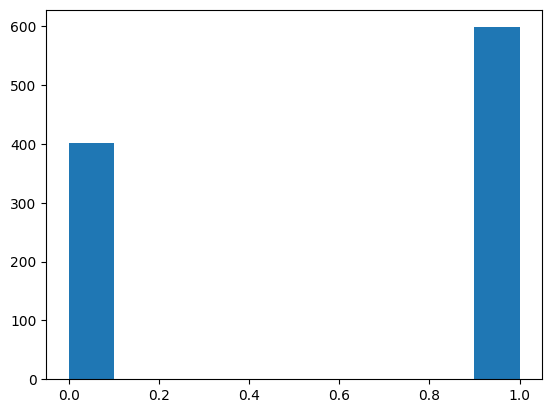

In [2]:
X = rng.choice([0,1], size=1000,p=[0.4, 0.6])
histogram(X)

Below is a geometric distribution. The only parameter is $p$, the probability of success on each Bernoulli trial. Note that even though the probability of success is about a third, there was one experiment that took twenty trials to succeed!

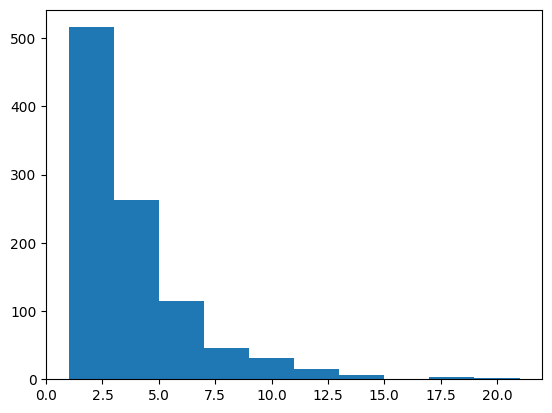

In [3]:
X = rng.geometric(p=0.31, size=1000)
histogram(X)

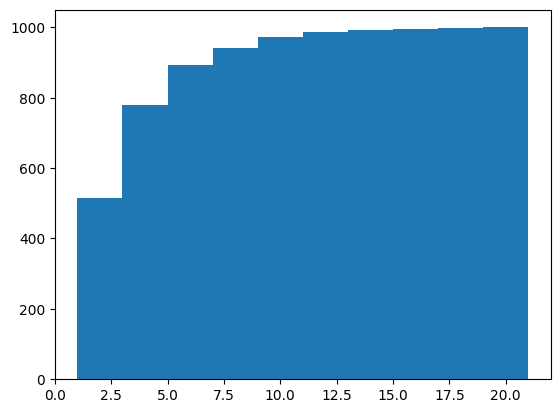

In [4]:
ogive(X)

The binomial and negative binomial distributions can be difficult to tell apart unless $n$ is large and the sample sizes are also large. In general, the binomal is centered while the negative binomial tends to have a tail on the right and the hump towards the left of the median, but here the thrid and fourth moments (skew and kurtosis) come in to play. Look for the hump and tail if you suspect it's a negative binomial. Changing the number of bins can sometimes help! However, ultimately _likelihood_ tests are the best way to tell them apart in machine learning, where we only have noisy and incomplete data to work with. By _maximizing_ the likelihood, we end up choosing the most probably distribution for all the data. More on this at the end of the course!

For now, let's look at the distributions in histograms, for a fairly large number of trials (100) in one thousand experiments.

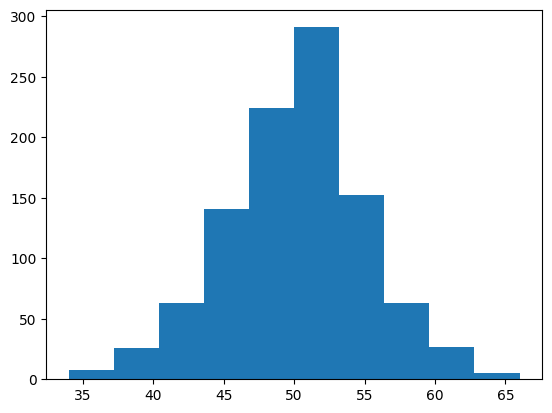

In [5]:
X = rng.binomial(n=100,p=.5,size=1000)
histogram(X)

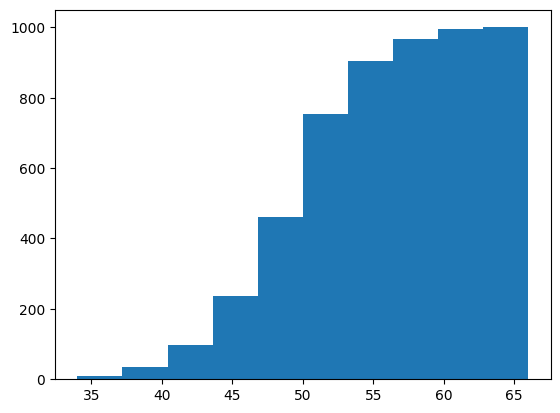

In [6]:
ogive(X)

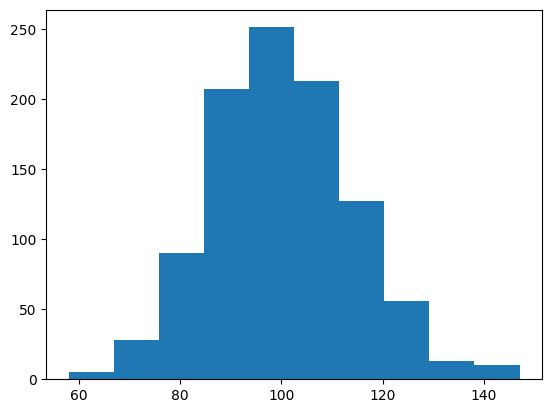

In [7]:
X = rng.negative_binomial(n=100,p=.5,size=1000)
histogram(X)

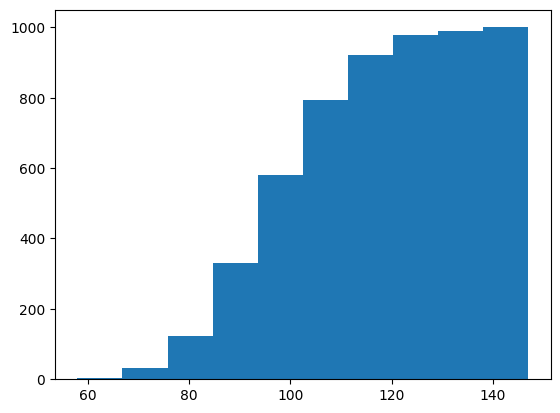

In [8]:
ogive(X)

It's hard to see, but there is a slight skew and kurtosis on the negative binomial. The tail is on the right, hump on the left; this is known as a _right skew_. The size and shape of the tail is the kurtosis moment. Also note that the CDF increases faster.

In a histogram for large samples and many trials $n$ it is practically impossible to tell a binomial distribution from a normal distribution. One clue is to look at the values -- a binomial has larger positive values, while a normal and standard normal have smaller negative and positive values (compared to the mean). 

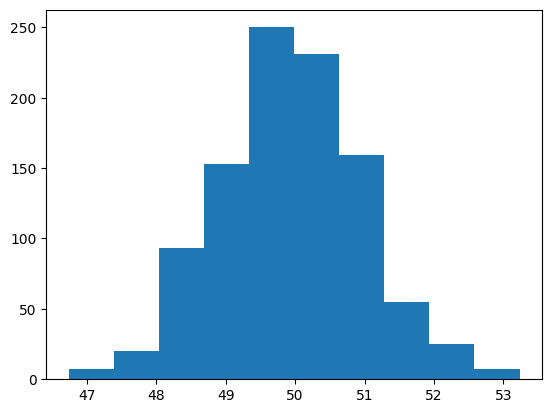

In [9]:
X = rng.normal(size=1000,loc=50)
histogram(X)

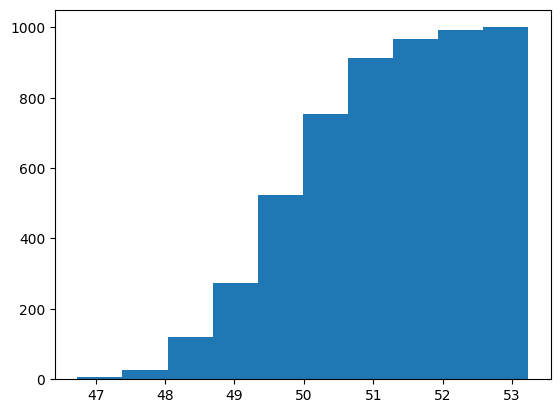

In [10]:
ogive(X)

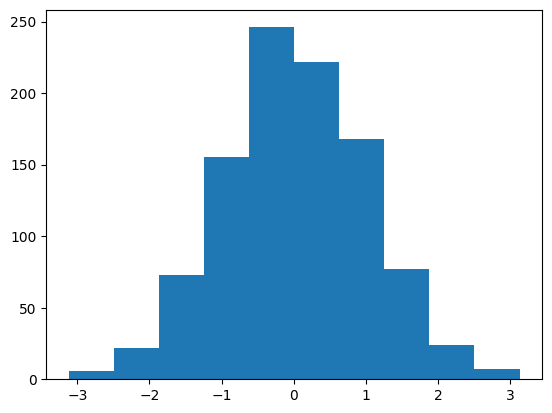

In [11]:
X = rng.standard_normal(size=1000)
histogram(X)

Now lets look at some data!

In [12]:
import pandas as pd

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Here, the Sales column is the result and the other columns are how much has been spent on each form of advertising. 


### Exercise 1

a) Make a histogram and/or ogive of the Sales column. Try to reason about what kind of distribution this is. Is there some known stochastic process or do you have to make some generic assumption?

b) Can you think of some mathematical method to figure out which distribution is most _alike_? (don't go too hard on trying to implement this one, it will probably be very frustrating)

b) Make a boxplot and comment on which plot you prefer (for whatever reason). 

Text(0.5, 1.0, 'Boxplot of Sales')

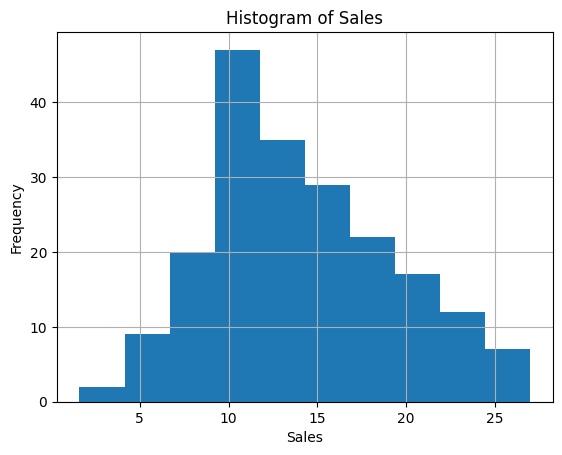

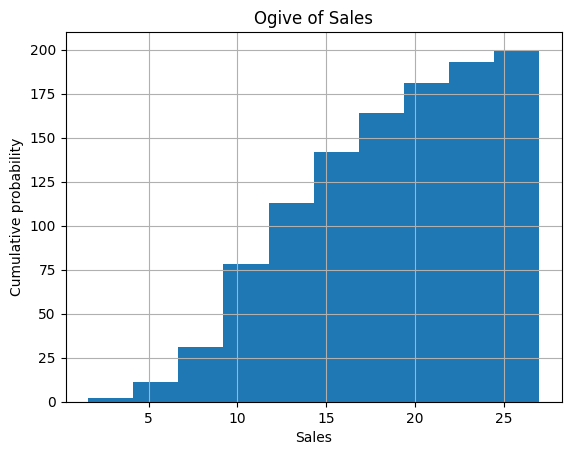

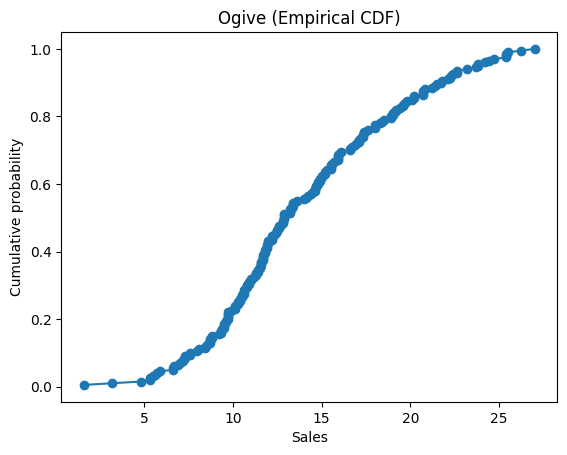

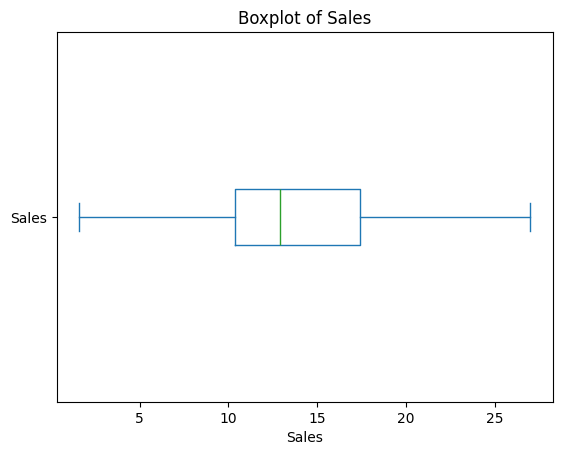

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# a)
# Histogram
plt.figure()
df["Sales"].hist(bins=10)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")

# Ogive (cumulative distribution)
plt.figure()
df["Sales"].hist(
    bins=10,
    cumulative=True,
)
plt.xlabel("Sales")
plt.ylabel("Cumulative probability")
plt.title("Ogive of Sales")
# ogive
plt.figure()

x = np.sort(df["Sales"])
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker="o", linestyle="-")
plt.xlabel("Sales")
plt.ylabel("Cumulative probability")
plt.title("Ogive (Empirical CDF)")

""" 
 Histogrammet är ungefär klockformat och ogiven har en S-form,
vilket tyder på att försäljningsdatan är approximativt normalfördelad.

"""
# b)
plt.figure()
df["Sales"].plot(kind="box", vert=False)
plt.xlabel("Sales")
plt.title("Boxplot of Sales")
"""No outliers are observed.
The mean is not centered in the box, indicating a skewed distribution rather than symmetry."""

For understanding the overall shape of the distribution, the histogram is preferred.
For a compact summary and comparison, the boxplot is more useful.

### Exercise 2

Produce scatter-plots of TV against Sales.

a) Can you identify some _trend_ visually?

b) How could you test for such a trend? <em>Tip: check out <code>cov</code> and <code>corr</code> in pandas DataFrame class</em>

c) Can you motivate your findings with mathematical statistics?

Covariance matrix:
                TV       Sales
TV     7370.949893  350.390195
Sales   350.390195   27.221853

Correlation matrix:
             TV     Sales
TV     1.000000  0.782224
Sales  0.782224  1.000000


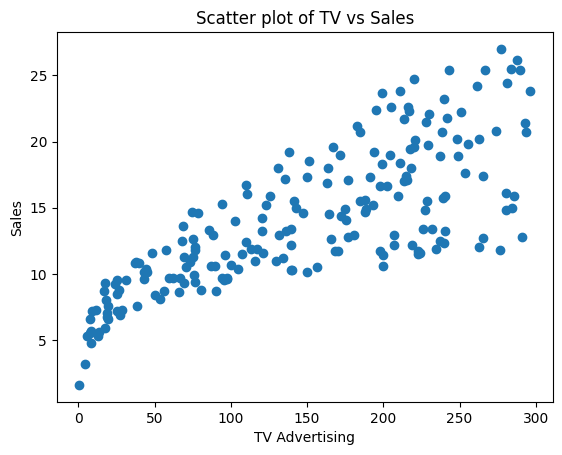

In [ ]:
# a)
plt.figure()
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Scatter plot of TV vs Sales")
#------------------------
# b)
# Covariance
cov_tv_sales = df[["TV", "Sales"]].cov()
print("Covariance matrix:")
print(cov_tv_sales)

# Correlation
corr_tv_sales = df[["TV", "Sales"]].corr()
print("\nCorrelation matrix:")
print(corr_tv_sales)

1. **Covariance (cov)** – shows whether the variables move together.

2. **Correlation (corr)** – measures the strength and direction of the linear relationship.

A positive covariance and a correlation coefficient close to +1 indicate a strong positive linear trend

**hypothesis test for correlation /linear regression code**

Pearson correlation r: 0.7822244248616067
p-value: 1.4673897001946247e-42
Reject H0: Significant linear correlation
Slope: 0.04753664043301975
Intercept: 7.032593549127695
R-squared: 0.6118750508500711
p-value: 1.4673897001946295e-42


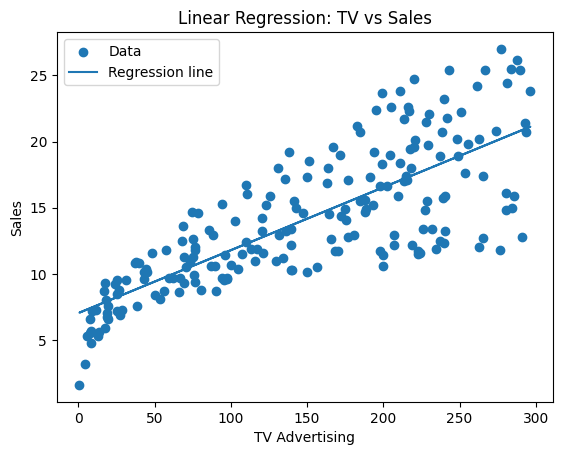

In [17]:
from scipy.stats import pearsonr

r, p_value = pearsonr(df["TV"], df["Sales"])

print("Pearson correlation r:", r)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant linear correlation")
else:
    print("Fail to reject H0: No significant linear correlation")
# a) Fit the model
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df["TV"], df["Sales"])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
# b) Plot regression line

plt.figure()
plt.scatter(df["TV"], df["Sales"], label="Data")
plt.plot(df["TV"], intercept + slope * df["TV"], label="Regression line")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Linear Regression: TV vs Sales")
plt.legend()

### Exercise 3

Use the same method from exercise 2 and investigate Radio and Newspaper.

Answer the same questions, where appropriate, for these other two variables.


Covariance matrix:
            Radio      Sales
Radio  220.427743  44.635688
Sales   44.635688  27.221853

Correlation matrix:
          Radio     Sales
Radio  1.000000  0.576223
Sales  0.576223  1.000000


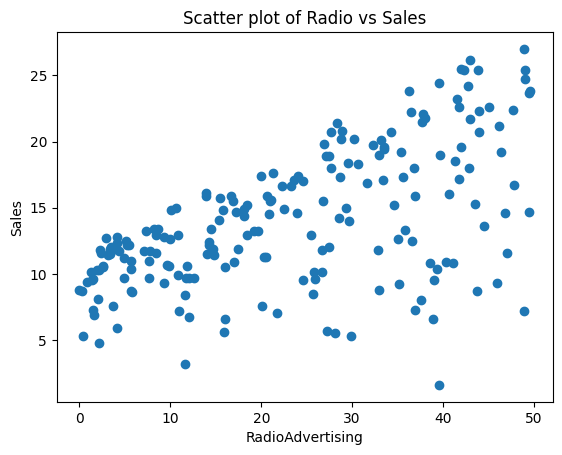

In [20]:
# a)
plt.figure()
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("RadioAdvertising")
plt.ylabel("Sales")
plt.title("Scatter plot of Radio vs Sales")
#------------------------
# b)
# Covariance
cov_Radio_sales = df[["Radio", "Sales"]].cov()
print("Covariance matrix:")
print(cov_Radio_sales)

# Correlation
corr_Radio_sales = df[["Radio", "Sales"]].corr()
print("\nCorrelation matrix:")
print(corr_Radio_sales)

Covariance matrix:
            Newspaper      Sales
Newspaper  474.308326  25.941392
Sales       25.941392  27.221853

Correlation matrix:
           Newspaper     Sales
Newspaper   1.000000  0.228299
Sales       0.228299  1.000000


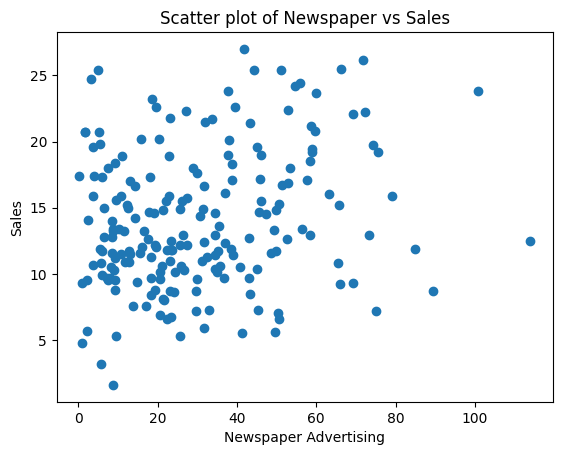

In [19]:
# a)
plt.figure()
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper Advertising")
plt.ylabel("Sales")
plt.title("Scatter plot of Newspaper vs Sales")
#------------------------
# b)
# Covariance
cov_Newspaper_sales = df[["Newspaper", "Sales"]].cov()
print("Covariance matrix:")
print(cov_Newspaper_sales)

# Correlation
corr_Newspaper_sales = df[["Newspaper", "Sales"]].corr()
print("\nCorrelation matrix:")
print(corr_Newspaper_sales)

#### Exercise 4

There are a lot of statistics computed automatically by pandas and numpy. 

Run the command <code> df.describe() </code>

Refer to the lecture notes and book to describe what the output of the command means.

a) How is the mean computed? Verify the value by computing it directly on your own.

b) How is the standard deviation computed? Verify the value as above.

c) What is the meaning of the remaining values?

In [21]:
# Summary statistics
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [22]:
#a) Verify the mean (manual computation)
mean_manual = df["Sales"].sum() / df["Sales"].count()
mean_pandas = df["Sales"].mean()

print("Mean (manual):", mean_manual)
print("Mean (pandas):", mean_pandas)


Mean (manual): 14.0225
Mean (pandas): 14.0225


In [23]:
#b) Verify the standard deviation (manual computation)
mean = df["Sales"].mean()
n = df["Sales"].count()

std_manual = np.sqrt(((df["Sales"] - mean) ** 2).sum() / (n - 1))
std_pandas = df["Sales"].std()

print("Std (manual):", std_manual)
print("Std (pandas):", std_pandas)


Std (manual): 5.217456565710478
Std (pandas): 5.217456565710478


In [24]:
#c) Remaining statistics (quartiles, min, max)
min_val = df["Sales"].min()
q1 = df["Sales"].quantile(0.25)
median = df["Sales"].median()
q3 = df["Sales"].quantile(0.75)
max_val = df["Sales"].max()

print("Min:", min_val)
print("Q1 (25%):", q1)
print("Median (50%):", median)
print("Q3 (75%):", q3)
print("Max:", max_val)


Min: 1.6
Q1 (25%): 10.375
Median (50%): 12.9
Q3 (75%): 17.4
Max: 27.0


### Exercise 5

Far from all usual statistics are computed by <code>describe()</code>, but they are easily available in pandas.

a) Find a function in pandas and use it to compute the median and mode of the columns in the dataframe. How do those location statistics compare to the mean?

b) Verify whether pandas uses _Bessel's correction_ for the sample variance. Compute it on your own and compare with what pandas reports. Why is Bessel's correction used at all?

In [26]:
# a) Median and mode in pandas
# Median
median_vals = df.median(numeric_only=True)
mean_vals = df.mean(numeric_only=True)

# Mode (can return multiple values)
mode_vals = df.mode(numeric_only=True)

print("Median:")
print(median_vals)
print("Mean:")
print(mean_vals)

print("\nMode:")
print(mode_vals)


Median:
TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64
Mean:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

Mode:
      TV  Radio  Newspaper  Sales
0   17.2    4.1        8.7    9.7
1   76.4    5.7        9.3    NaN
2  109.8    NaN       25.6    NaN
3  177.0    NaN        NaN    NaN
4  184.9    NaN        NaN    NaN
5  197.6    NaN        NaN    NaN
6  199.8    NaN        NaN    NaN
7  222.4    NaN        NaN    NaN
8  237.4    NaN        NaN    NaN
9  240.1    NaN        NaN    NaN


The mode is not informative for these variables because the data are continuous and most observations are unique. As a result, many values are equally frequent, leading pandas to report multiple modes and NaN values

-----------------------------------------------
Interpretation

- Mean uses all values and is sensitive to extreme observations.

- Median is the middle value and is robust to outliers.

- Mode is the most frequent value (may not be unique or informative for continuous data).

Comparison:

If mean > median, the distribution is right-skewed.

If mean < median, the distribution is left-skewed.

If mean ≈ median, the distribution is approximately symmetric.

In [28]:
# b) compare pandas variance vs manual variance

x = df["Sales"].dropna()
n = len(x)
mean = x.mean()

# Pandas variance (default)
var_pandas = x.var()          # ddof=1 by default
std= np.sqrt(var_pandas)
# Manual variance with Bessel’s correction (n-1)
var_n_minus_1 = ((x - mean) ** 2).sum() / (n - 1)

# Manual variance without Bessel’s correction (n)
var_n = ((x - mean) ** 2).sum() / n

print("Variance (pandas):        ", var_pandas)
print("Standard devition" , std)
print("Variance (manual, n-1):   ", var_n_minus_1)
print("Variance (manual, n):     ", var_n)


Variance (pandas):         27.22185301507538
Standard devition 5.217456565710478
Variance (manual, n-1):    27.22185301507538
Variance (manual, n):      27.085743750000002


**Variance tells us how much the values differ from the average.**

With a mean Sales value of 14.02 and a variance of approximately 27.22, the data show a moderate spread around the mean, corresponding to a standard deviation of about 5.22 units.
